<a href="https://colab.research.google.com/github/mounishvatti/pothole_detection_yolov8/blob/main/PotholeDetectionUsingYOLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import os
import glob
from IPython.display import Image, display

In [2]:
!nvidia-smi

Wed Oct  2 21:29:54 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 551.76                 Driver Version: 551.76         CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4060 ...  WDDM  |   00000000:01:00.0  On |                  N/A |
| N/A   39C    P8              6W /  104W |    1084MiB /   8188MiB |      2%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [6]:
HOME = os.getcwd()
print(HOME)

c:\Users\lee\YOLO


In [7]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.100  Python-3.10.14 torch-2.4.1 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
Setup complete  (32 CPUs, 31.7 GB RAM, 447.5/466.2 GB disk)


In [8]:
os.makedirs(os.path.join(HOME, 'datasets'),exist_ok=True)

In [9]:
from dotenv import load_dotenv
import os

# 경로를 명시적으로 지정합니다.
load_dotenv(dotenv_path='.env')

# 환경 변수에서 API 키를 가져옵니다.
api_key = os.getenv('API_KEY')

In [11]:
from roboflow import Roboflow

rf = Roboflow(api_key=api_key)
project = rf.workspace("hiteshram").project("object-detection-bounding-box-ftfs5")
version = project.version(1)
dataset = version.download("yolov8", location=os.path.join(HOME, 'datasets'))

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.100, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to c:\Users\lee\YOLO\datasets in yolov8:: 100%|██████████| 800/800 [00:00<00:00, 3173.50it/s]


In [12]:
!pip install fastapi kaleido python_multipart uvicorn

In [13]:
# names:
# - Potholes
# nc: 1
# roboflow:
#   license: CC BY 4.0
#   project: object-detection-bounding-box-ftfs5
#   url: https://universe.roboflow.com/hiteshram/object-detection-bounding-box-ftfs5/dataset/1
#   version: 1
#   workspace: hiteshram
# test: ../test/images
# train: ObjectDetection/train/images
# val: ObjectDetection/valid/images

In [14]:
import torch, os

dstPath = 'datasets'
yamlPath = os.path.join(HOME, dstPath,'data.yaml')
print(yamlPath)


c:\Users\lee\YOLO\datasets\data.yaml


In [23]:
from ultralytics import YOLO

# Load a COCO-pretrained YOLO11n model
model = YOLO(model='yolov8n.pt')

# Train the model
model.train(data=yamlPath, epochs=50, imgsz=640)

New https://pypi.org/project/ultralytics/8.3.3 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.100  Python-3.10.14 torch-2.4.1 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=c:\Users\lee\YOLO\datasets\data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embe

2024-10-02 21:36:35,849 - hub_sdk.helpers.logger - WARNING - Ultralytics HUB-SDK: Invalid API key ⚠️


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed 


train: Scanning C:\Users\lee\YOLO\datasets\train\labels... 354 images, 0 backgrounds, 0 corrupt: 100%|██████████| 354/354 [00:00<00:00, 494.97it/s]

train: New cache created: C:\Users\lee\YOLO\datasets\train\labels.cache



val: Scanning C:\Users\lee\YOLO\datasets\valid\labels... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<00:00, 178.57it/s]

val: New cache created: C:\Users\lee\YOLO\datasets\valid\labels.cache


Plotting labels to runs\detect\train\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.39G      1.976      2.682      2.023         29        640: 100%|██████████| 23/23 [00:05<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.48it/s]

                   all         20         98    0.00983      0.602     0.0209    0.00572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.26G      1.659      2.193      1.836         16        640: 100%|██████████| 23/23 [00:02<00:00,  8.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.04it/s]

                   all         20         98      0.209     0.0612     0.0835     0.0235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.27G      1.688      2.134      1.855         23        640: 100%|██████████| 23/23 [00:02<00:00,  8.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.32it/s]

                   all         20         98      0.128      0.153     0.0953     0.0268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.26G      1.648      2.032      1.802         21        640: 100%|██████████| 23/23 [00:02<00:00,  9.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.86it/s]

                   all         20         98      0.185      0.347      0.172     0.0472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.25G       1.61      1.967      1.773         17        640: 100%|██████████| 23/23 [00:02<00:00,  9.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.65it/s]

                   all         20         98      0.127      0.367      0.112     0.0312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.26G      1.624       1.95      1.772         23        640: 100%|██████████| 23/23 [00:02<00:00,  9.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.50it/s]

                   all         20         98      0.267      0.245      0.146     0.0436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.39G        1.6      1.917      1.774         19        640: 100%|██████████| 23/23 [00:02<00:00,  8.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.61it/s]

                   all         20         98      0.298      0.325        0.2     0.0621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.26G      1.582      1.902      1.731         10        640: 100%|██████████| 23/23 [00:02<00:00,  8.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.88it/s]

                   all         20         98      0.269      0.224      0.169     0.0502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.27G      1.562      1.846      1.729         13        640: 100%|██████████| 23/23 [00:02<00:00,  8.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.31it/s]

                   all         20         98      0.346      0.306      0.254     0.0893



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.28G      1.535      1.839      1.709         17        640: 100%|██████████| 23/23 [00:02<00:00,  8.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.90it/s]

                   all         20         98      0.462      0.464      0.407      0.132



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.24G      1.524      1.793      1.697         13        640: 100%|██████████| 23/23 [00:02<00:00,  8.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.71it/s]

                   all         20         98      0.472      0.459      0.458      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.26G      1.508      1.711      1.683         19        640: 100%|██████████| 23/23 [00:02<00:00,  8.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.61it/s]

                   all         20         98      0.366      0.367      0.263     0.0801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.28G      1.484      1.707      1.678         29        640: 100%|██████████| 23/23 [00:02<00:00,  8.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.14it/s]

                   all         20         98      0.343      0.367      0.291     0.0945



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.21G      1.465      1.688       1.64         14        640: 100%|██████████| 23/23 [00:02<00:00,  8.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.52it/s]

                   all         20         98      0.408      0.439       0.34      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.26G      1.438      1.672      1.631         11        640: 100%|██████████| 23/23 [00:02<00:00,  8.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.20it/s]

                   all         20         98      0.531       0.44      0.429      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.29G      1.399      1.654      1.609         12        640: 100%|██████████| 23/23 [00:02<00:00,  8.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.77it/s]

                   all         20         98      0.535      0.541      0.484      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.27G      1.422       1.59      1.603         17        640: 100%|██████████| 23/23 [00:02<00:00,  8.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.90it/s]

                   all         20         98      0.389       0.48      0.376      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.39G      1.403      1.609      1.592         30        640: 100%|██████████| 23/23 [00:02<00:00,  8.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.56it/s]

                   all         20         98      0.575      0.524      0.512      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.26G      1.388      1.548      1.574         17        640: 100%|██████████| 23/23 [00:02<00:00,  8.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.66it/s]

                   all         20         98      0.452       0.51      0.462      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.26G       1.42      1.564      1.623         10        640: 100%|██████████| 23/23 [00:02<00:00,  8.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.62it/s]

                   all         20         98      0.414      0.426      0.385      0.127



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.27G      1.374      1.523      1.586         20        640: 100%|██████████| 23/23 [00:02<00:00,  8.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.05it/s]

                   all         20         98      0.486      0.418      0.431      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.25G      1.348       1.44       1.55         15        640: 100%|██████████| 23/23 [00:02<00:00,  9.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.74it/s]

                   all         20         98      0.672      0.347      0.427      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.25G      1.356       1.47      1.548         37        640: 100%|██████████| 23/23 [00:02<00:00,  9.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.78it/s]

                   all         20         98      0.635      0.367      0.426      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.29G      1.363      1.458      1.547         43        640: 100%|██████████| 23/23 [00:02<00:00,  9.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.53it/s]

                   all         20         98      0.585      0.439      0.469      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.28G      1.344      1.436      1.559         10        640: 100%|██████████| 23/23 [00:02<00:00,  9.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.31it/s]

                   all         20         98      0.497      0.541      0.507      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.37G      1.317      1.414      1.526         15        640: 100%|██████████| 23/23 [00:02<00:00,  8.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.41it/s]

                   all         20         98        0.6      0.439       0.51      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.34G      1.325      1.391      1.524         16        640: 100%|██████████| 23/23 [00:02<00:00,  8.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.53it/s]

                   all         20         98      0.468      0.531       0.49      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50       2.3G      1.289      1.401      1.506         13        640: 100%|██████████| 23/23 [00:02<00:00,  9.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.07it/s]

                   all         20         98      0.686      0.446      0.536      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.29G      1.301      1.363       1.52         16        640: 100%|██████████| 23/23 [00:02<00:00,  9.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.87it/s]

                   all         20         98      0.556      0.575      0.546      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.27G      1.286      1.339      1.504         16        640: 100%|██████████| 23/23 [00:02<00:00,  8.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.50it/s]

                   all         20         98      0.474      0.569      0.533      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.23G      1.284      1.336      1.502         25        640: 100%|██████████| 23/23 [00:02<00:00,  8.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.15it/s]

                   all         20         98      0.649      0.439      0.513      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.27G      1.234      1.259      1.471         15        640: 100%|██████████| 23/23 [00:02<00:00,  8.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.76it/s]

                   all         20         98      0.715       0.49      0.579      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.27G       1.25      1.283       1.47         40        640: 100%|██████████| 23/23 [00:02<00:00,  8.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.06it/s]

                   all         20         98      0.468      0.439      0.507      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.36G      1.278      1.296      1.503          4        640: 100%|██████████| 23/23 [00:02<00:00,  8.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.34it/s]

                   all         20         98      0.658      0.394      0.502      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.28G      1.244      1.235      1.459         22        640: 100%|██████████| 23/23 [00:02<00:00,  8.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.38it/s]

                   all         20         98      0.671      0.449      0.535      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.25G      1.209      1.204      1.444         29        640: 100%|██████████| 23/23 [00:02<00:00,  8.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.87it/s]

                   all         20         98      0.607      0.457      0.556      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.28G      1.224      1.212      1.452         23        640: 100%|██████████| 23/23 [00:02<00:00,  8.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.65it/s]

                   all         20         98       0.57      0.459      0.519      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.35G      1.182      1.149       1.41         18        640: 100%|██████████| 23/23 [00:02<00:00,  8.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.47it/s]

                   all         20         98       0.51      0.663      0.597      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.27G      1.176      1.133      1.399         16        640: 100%|██████████| 23/23 [00:02<00:00,  8.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.49it/s]

                   all         20         98      0.725      0.449      0.565      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.26G      1.176       1.15      1.413         16        640: 100%|██████████| 23/23 [00:02<00:00,  8.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.85it/s]

                   all         20         98      0.624      0.439      0.531      0.193


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.22G      1.238      1.188       1.47          8        640: 100%|██████████| 23/23 [00:02<00:00,  8.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.80it/s]

                   all         20         98      0.729      0.357       0.51      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.25G      1.215      1.124      1.434         23        640: 100%|██████████| 23/23 [00:02<00:00,  8.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.48it/s]

                   all         20         98      0.607        0.5      0.579      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.24G      1.159      1.063      1.405         13        640: 100%|██████████| 23/23 [00:02<00:00,  8.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.81it/s]

                   all         20         98      0.579      0.541      0.583      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.24G      1.147      1.086       1.42          2        640: 100%|██████████| 23/23 [00:02<00:00,  8.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.26it/s]

                   all         20         98      0.739      0.439       0.58      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.24G      1.146      1.016      1.399         12        640: 100%|██████████| 23/23 [00:02<00:00,  8.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.10it/s]

                   all         20         98      0.666        0.5        0.6      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.22G      1.109      1.009      1.364         16        640: 100%|██████████| 23/23 [00:02<00:00,  8.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.69it/s]

                   all         20         98      0.726       0.48      0.592      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.24G       1.07     0.9591      1.338          9        640: 100%|██████████| 23/23 [00:02<00:00,  8.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.78it/s]

                   all         20         98      0.691      0.525      0.622      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.25G      1.069     0.9654      1.339         16        640: 100%|██████████| 23/23 [00:02<00:00,  8.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.75it/s]

                   all         20         98      0.638      0.592      0.636      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.22G       1.07     0.9529      1.334         13        640: 100%|██████████| 23/23 [00:02<00:00,  8.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.17it/s]

                   all         20         98      0.676      0.602       0.64      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.24G      1.072     0.9469      1.329          9        640: 100%|██████████| 23/23 [00:02<00:00,  9.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.42it/s]

                   all         20         98      0.708      0.571      0.634      0.279



50 epochs completed in 0.050 hours.
Optimizer stripped from runs\detect\train\weights\last.pt, 6.2MB
Optimizer stripped from runs\detect\train\weights\best.pt, 6.2MB

Validating runs\detect\train\weights\best.pt...
Ultralytics YOLOv8.2.100  Python-3.10.14 torch-2.4.1 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.74it/s]


                   all         20         98      0.677      0.602       0.64      0.277
Speed: 0.2ms preprocess, 1.7ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs\detect\train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000001FDBA7F4A90>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0480

In [ ]:
#!yolo task=detect mode=train model=yolo11n.pt data={yamlPath} epochs=70 imgsz=640

In [26]:
os.listdir(f'{HOME}//runs/detect/train')

['args.yaml',
 'confusion_matrix.png',
 'confusion_matrix_normalized.png',
 'F1_curve.png',
 'labels.jpg',
 'labels_correlogram.jpg',
 'PR_curve.png',
 'P_curve.png',
 'results.csv',
 'results.png',
 'R_curve.png',
 'train_batch0.jpg',
 'train_batch1.jpg',
 'train_batch2.jpg',
 'train_batch920.jpg',
 'train_batch921.jpg',
 'train_batch922.jpg',
 'val_batch0_labels.jpg',
 'val_batch0_pred.jpg',
 'weights']

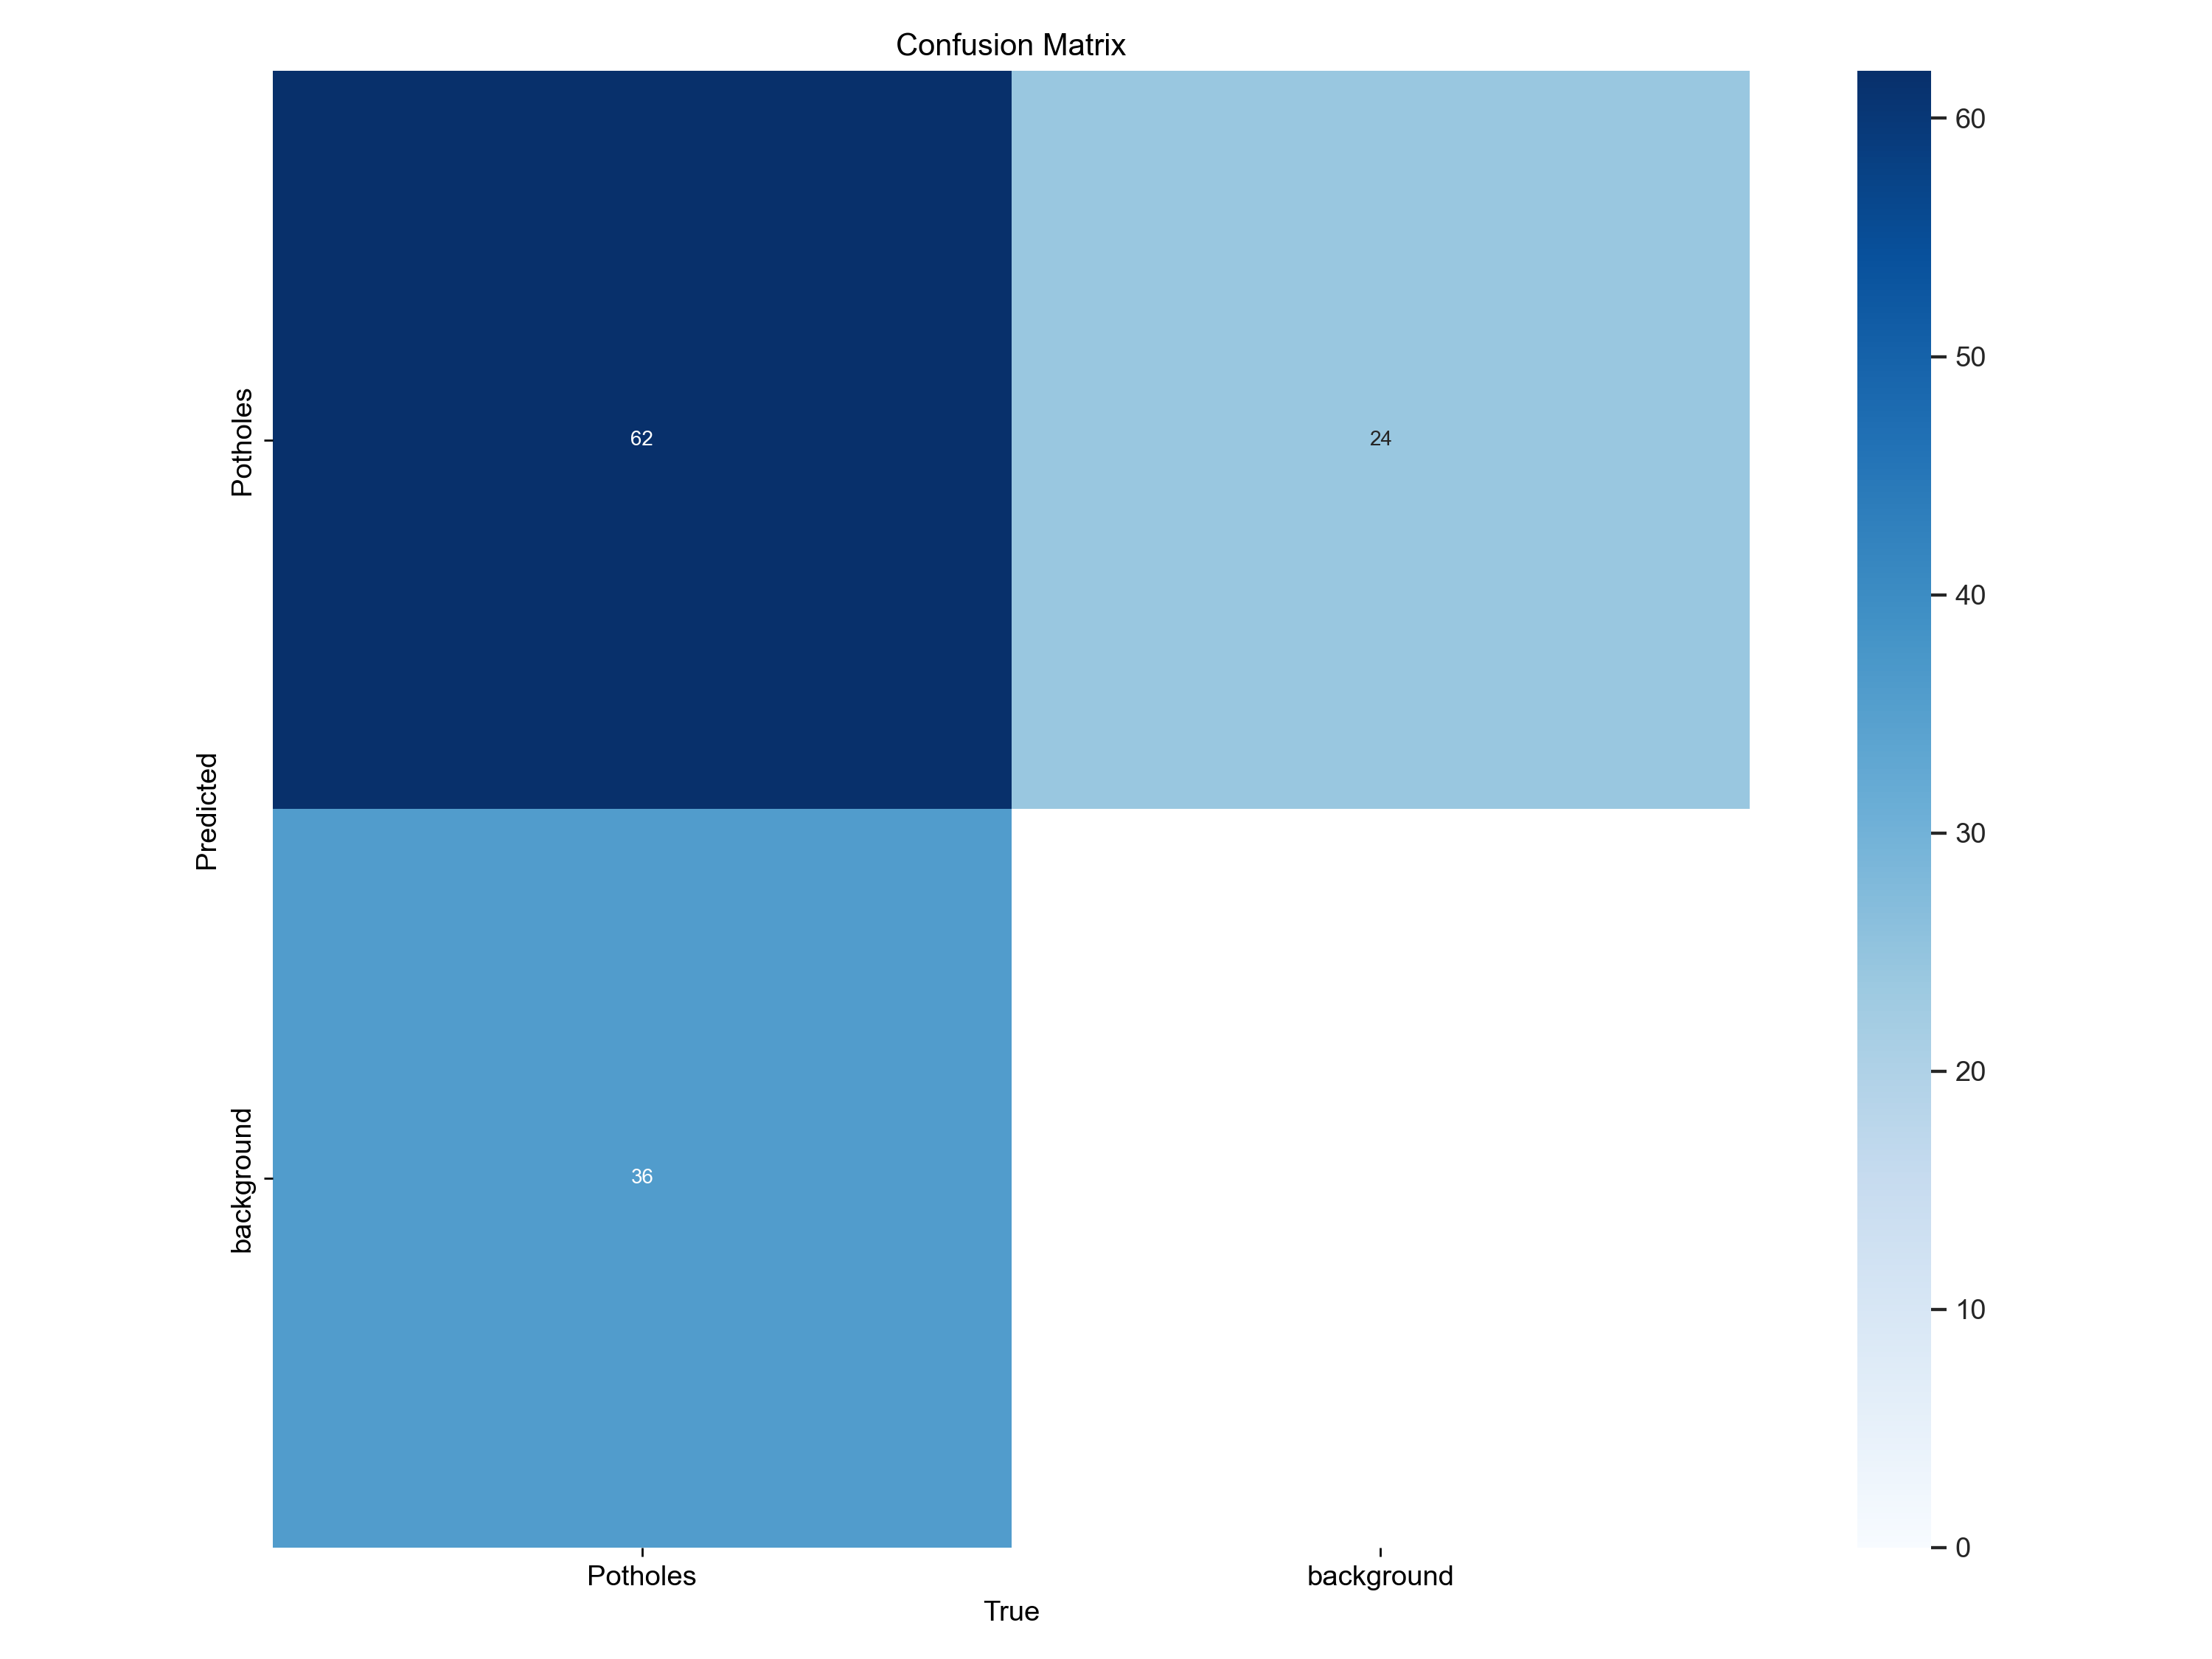

In [27]:
Image(filename = f'{HOME}/runs/detect/train/confusion_matrix.png', width = 900)

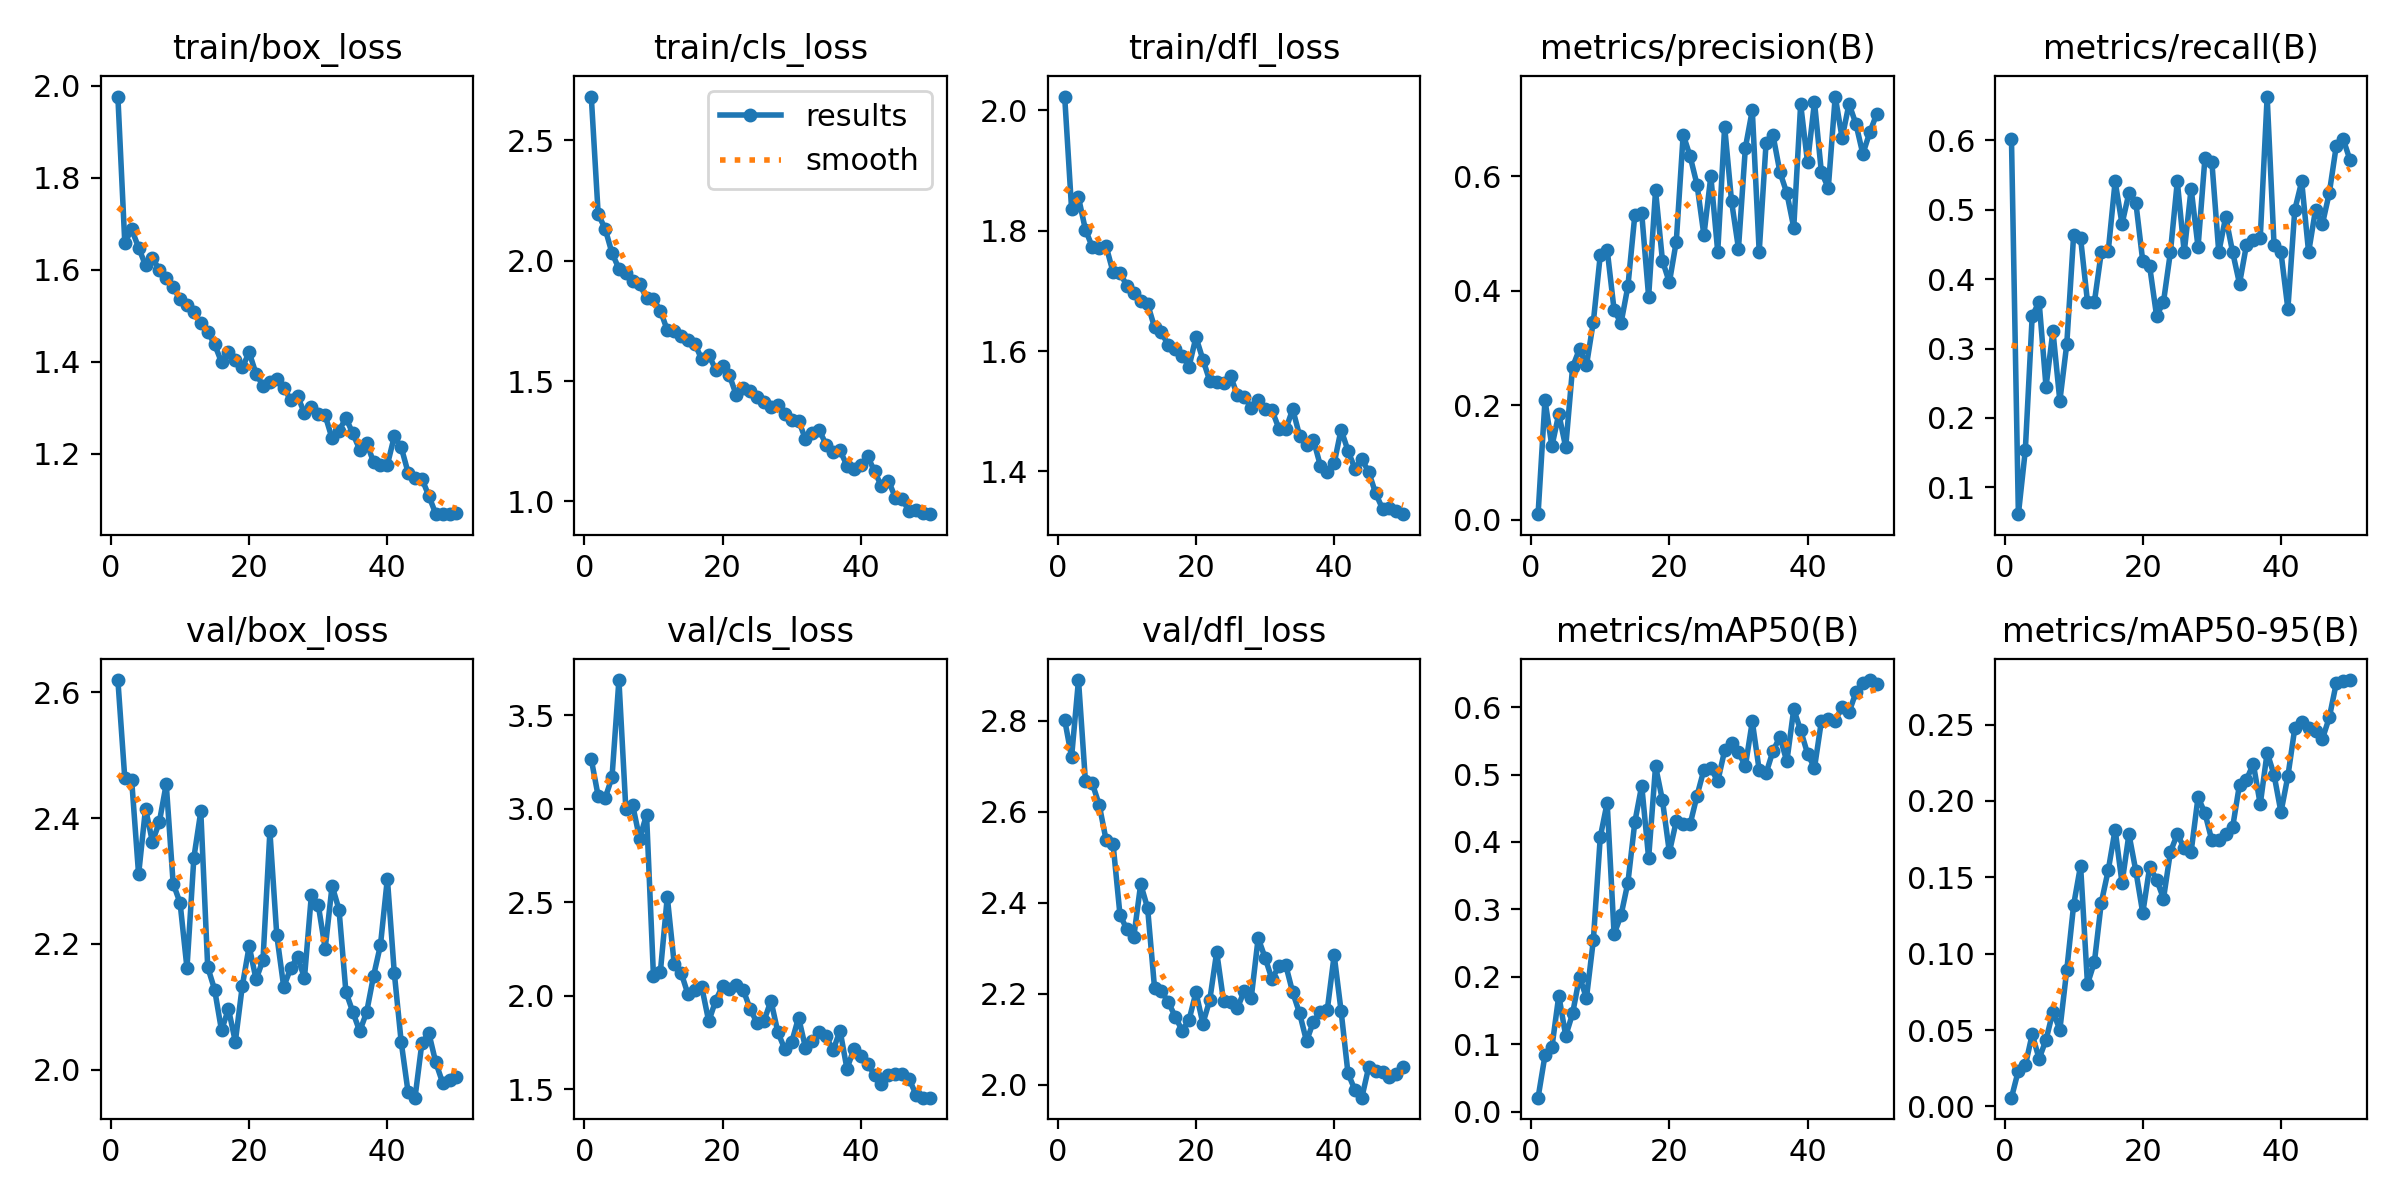

In [28]:
Image(filename = f'{HOME}/runs/detect/train/results.png', width = 600)

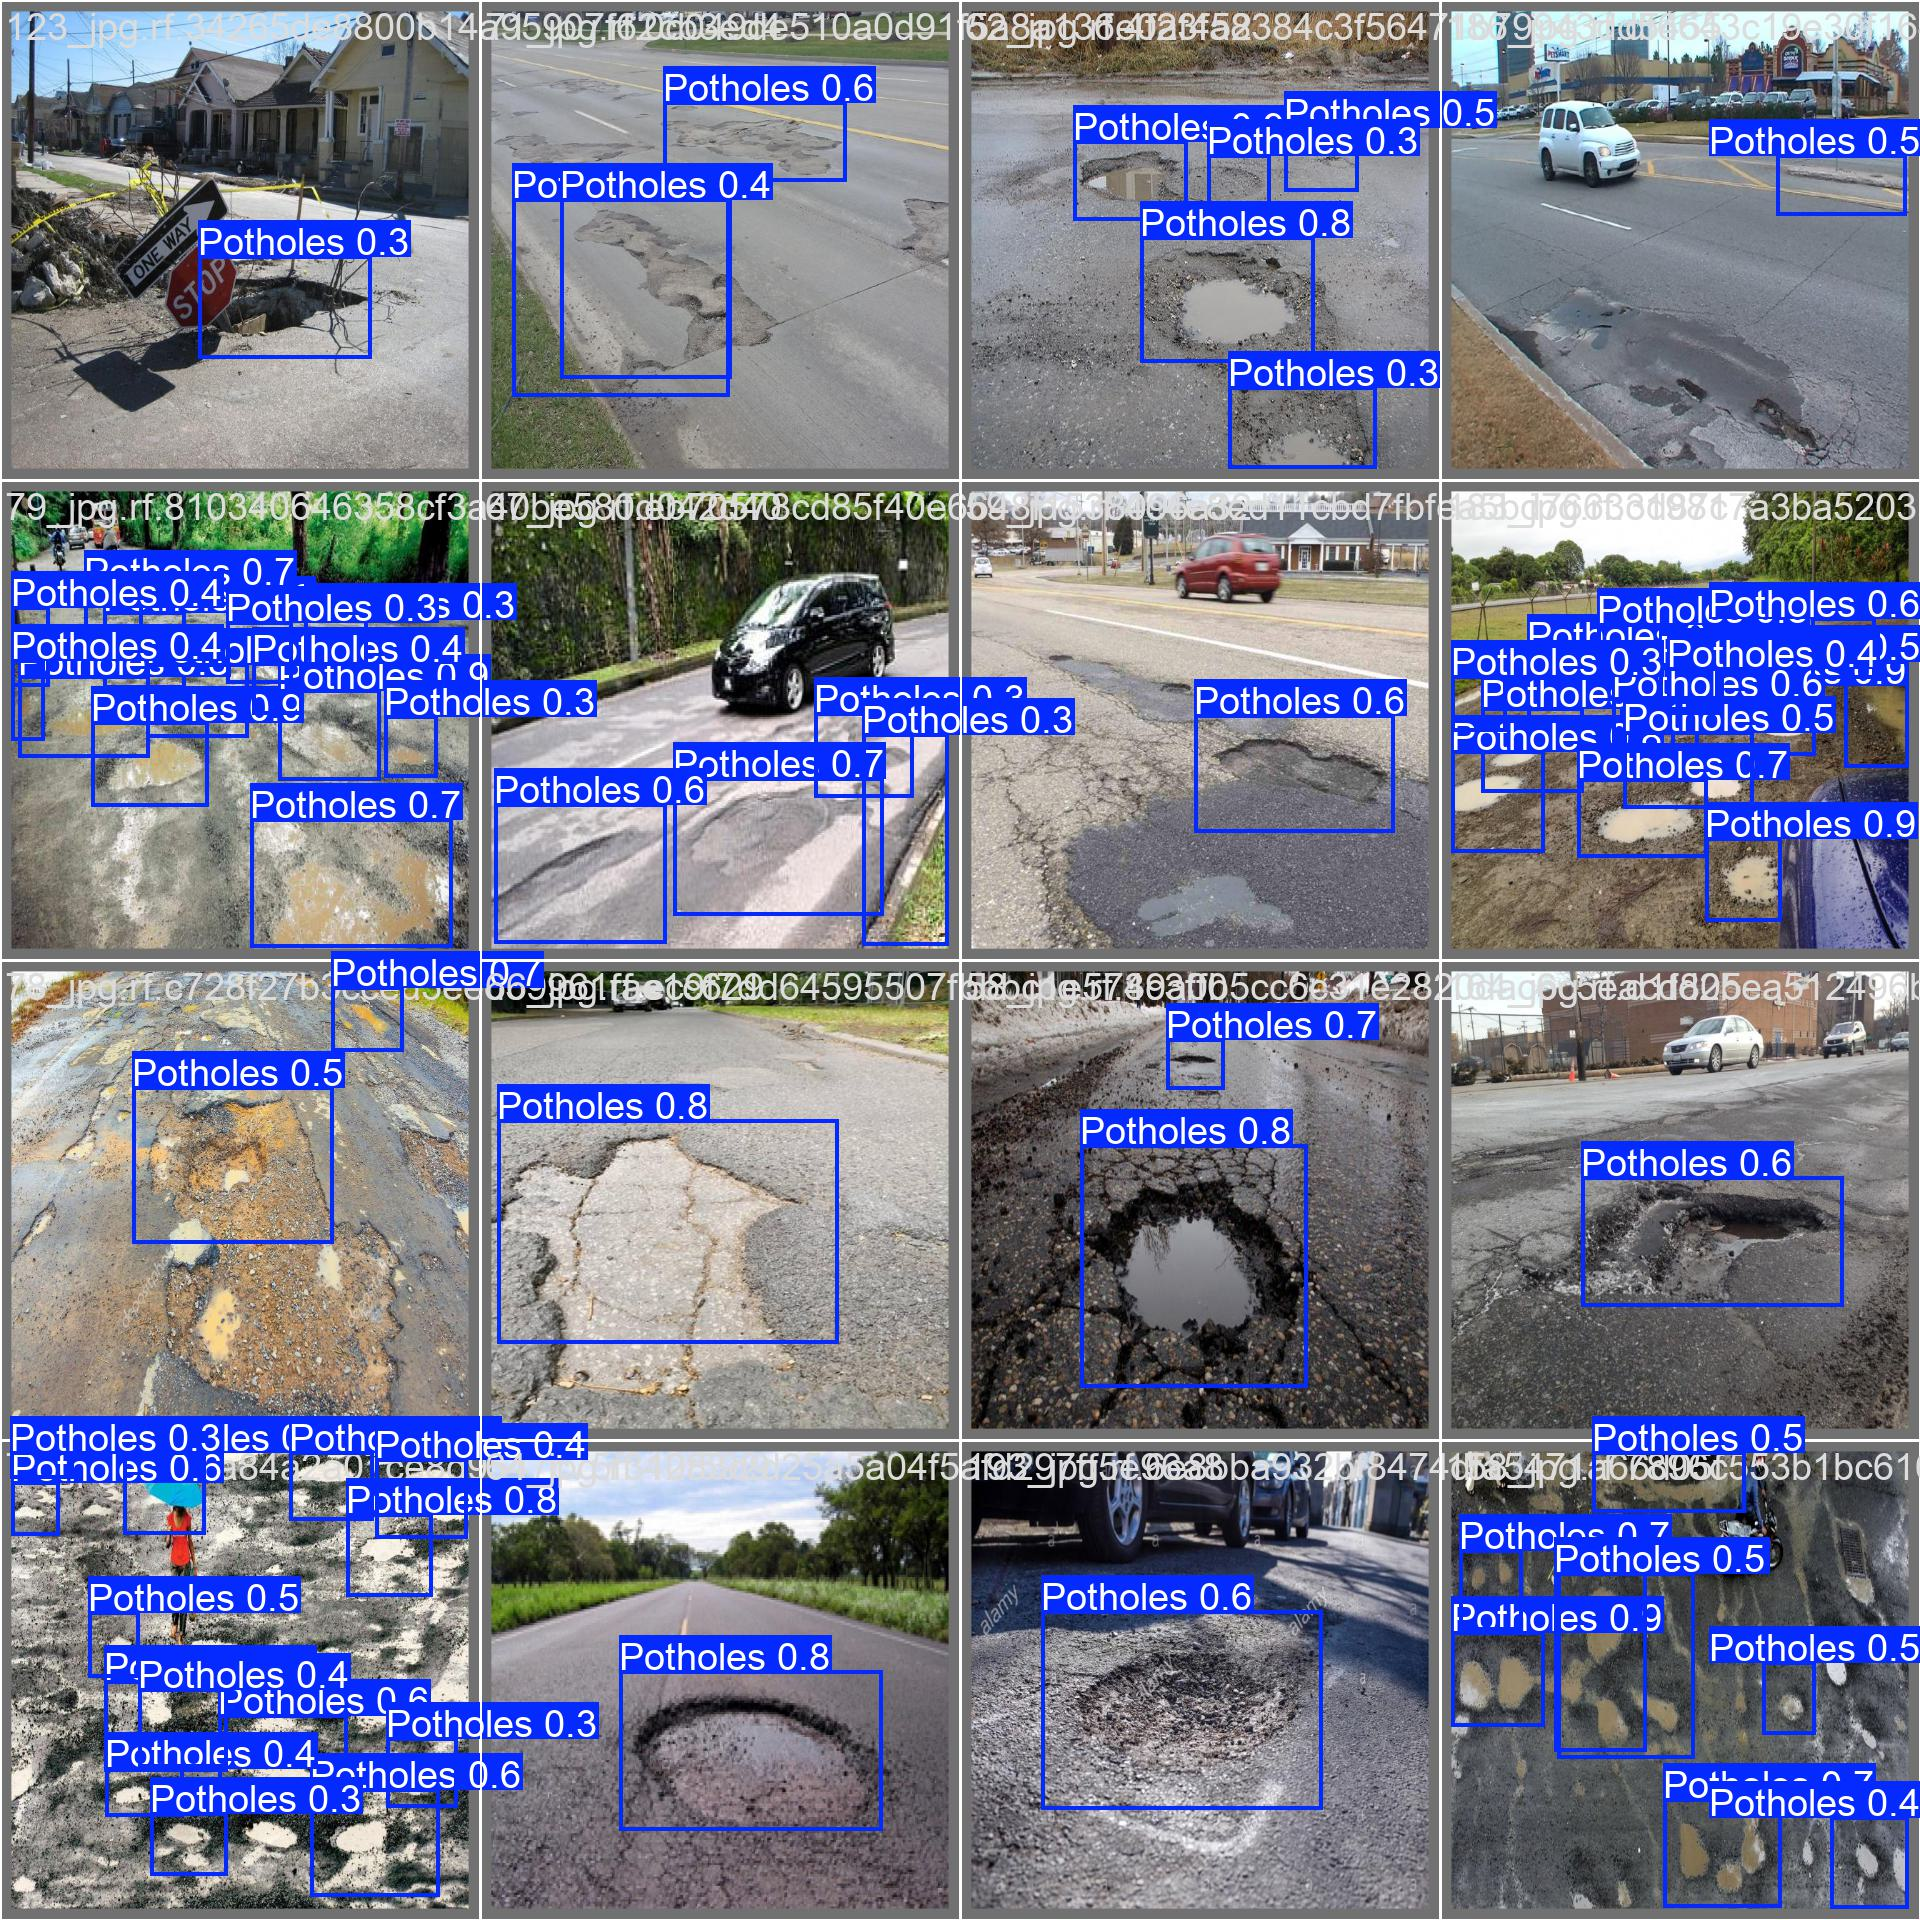

In [29]:
Image(filename = f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width = 600)

In [30]:
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data=/content/drive/MyDrive/potholedetection/data.yaml

Ultralytics 8.3.3 🚀 Python-3.10.14 torch-2.4.1 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


Traceback (most recent call last):
  File "C:\Users\lee\miniconda3\envs\pytorch\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\lee\miniconda3\envs\pytorch\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "C:\Users\lee\miniconda3\envs\pytorch\Scripts\yolo.exe\__main__.py", line 7, in <module>
    sys.exit(entrypoint())
  File "C:\Users\lee\miniconda3\envs\pytorch\lib\site-packages\ultralytics\cfg\__init__.py", line 831, in entrypoint
    getattr(model, mode)(**overrides)  # default args from model
  File "C:\Users\lee\miniconda3\envs\pytorch\lib\site-packages\ultralytics\engine\model.py", line 635, in val
    validator(model=self.model)
  File "C:\Users\lee\miniconda3\envs\pytorch\lib\site-packages\torch\utils\_contextlib.py", line 116, in decorate_context
    return func(*args, **kwargs)
  File "C:\Users\lee\miniconda3\envs\pytorch\lib\site-packages\ultralytics\engine\validator.py", line 142, in __c

In [33]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source=datasets/test/images

Ultralytics 8.3.3 🚀 Python-3.10.14 torch-2.4.1 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs

image 1/20 c:\Users\lee\YOLO\datasets\test\images\106_jpg.rf.12693aed3783446751b93aeb94d8bafe.jpg: 640x640 5 Potholess, 10.0ms
image 2/20 c:\Users\lee\YOLO\datasets\test\images\111_jpg.rf.91472dc665da666b10d8fa58d88463aa.jpg: 640x640 4 Potholess, 5.0ms
image 3/20 c:\Users\lee\YOLO\datasets\test\images\131_jpg.rf.f49fe5d93fab29363b8b04f6b89d5330.jpg: 640x640 9 Potholess, 5.0ms
image 4/20 c:\Users\lee\YOLO\datasets\test\images\142_jpg.rf.ef9f025b2536187f2dbbbdb80bc8bfb1.jpg: 640x640 2 Potholess, 5.0ms
image 5/20 c:\Users\lee\YOLO\datasets\test\images\150_jpg.rf.7808eb72654e8521bb8b25743c94bbc4.jpg: 640x640 2 Potholess, 13.0ms
image 6/20 c:\Users\lee\YOLO\datasets\test\images\153_jpg.rf.a71edc2ff4bd81850c0423b23e29caa9.jpg: 640x640 1 Potholes, 8.4ms
image 7/20 c:\Users\lee\YOLO\datasets\test\images\166_jpg.rf.

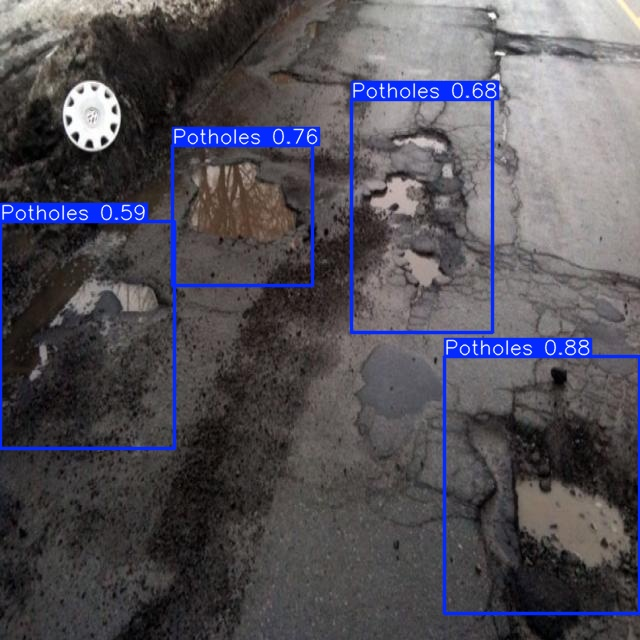

In [38]:
Image('runs/detect/predict/53_jpg.rf.1728a82ac1770339da7b19cc6a6b6c8a.jpg')

In [ ]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source='/content/drive/MyDrive/demo.mp4'

In [ ]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = '/content/runs/detect/predict2/demo.avi'

# Compressed video path
compressed_path = "/content/result_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path, 'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML(f"""<video width="640" height="480" controls>
    <source src="{data_url}" type="video/mp4">
</video>""")
